# BW 113, US airports

1. Download the data for the six airports, and combine them into a single data frame. Turn the "Flight Date" and "HourRange" columns into a single `datetime` column (using the first time in "HourRange"). Set the index to combine the "IATA" column (i.e., the airport name) and the "datetime" column.
2. Create a line graph showing, on a monthly basis, how many non-US passengers entered the US at each airport in this data set. Do we see any recent downturn?


In [2]:
import pandas as pd
import glob

glob.glob('/Users/reuven/BambooWeekly/notebooks/data/Aw*xlsx')


['/Users/reuven/BambooWeekly/notebooks/data/Awt.cbp.gov_SFO_2023-01-04-2025-07-04.xlsx',
 '/Users/reuven/BambooWeekly/notebooks/data/Awt.cbp.gov_EWR_2023-01-04-2025-07-04.xlsx',
 '/Users/reuven/BambooWeekly/notebooks/data/Awt.cbp.gov_A273_2023-01-04-2025-07-04.xlsx',
 '/Users/reuven/BambooWeekly/notebooks/data/Awt.cbp.gov_A392_2023-01-04-2025-07-04.xlsx',
 '/Users/reuven/BambooWeekly/notebooks/data/Awt.cbp.gov_DFW_2023-01-04-2025-07-04.xlsx',
 '/Users/reuven/BambooWeekly/notebooks/data/Awt.cbp.gov_ATL_2023-01-04-2025-07-04.xlsx']

In [4]:
all_dfs = [pd.read_excel(one_filename)
             for one_filename in glob.glob('/Users/reuven/BambooWeekly/notebooks/data/Aw*xlsx')]


In [5]:
df = pd.concat(all_dfs)

In [6]:
df.shape

(102152, 25)

In [7]:
df.head()

,IATA,Name,TerminalName,Average_0_15_PassengerCount,Flight Date,UsaPassengerAverageWait,UsaPassengerMaxWait,HourRange,Average_16_30_PassengerCount,AverageWait,...,MaxWait,Average_61_90_PassengerCount,Average_91_120_PassengerCount,Average_121_PassengerCount,ExcludedPassengerCount,FlightCount,TotalPassengerCount,BoothsUsed,UsaPassengerCount,NonUsaPassengerCount
0,SFO,San Francisco International Airport,Terminal A,107,2023-04-01,9,16,0000 - 0100,45,13,...,28,0,0,0,6,1,158,8,95,63
1,SFO,San Francisco International Airport,Terminal A,114,2023-04-01,29,53,0900 - 1000,142,29,...,53,0,0,0,13,2,493,16,289,204
2,SFO,San Francisco International Airport,Terminal A,346,2023-04-01,15,50,1000 - 1100,196,18,...,50,0,0,0,28,3,722,19,330,392
3,SFO,San Francisco International Airport,Terminal A,173,2023-04-01,14,30,1100 - 1200,293,21,...,43,0,0,0,12,3,591,15,221,370
4,SFO,San Francisco International Airport,Terminal A,221,2023-04-01,11,21,1200 - 1300,100,13,...,23,0,0,0,7,2,328,21,105,223


In [13]:
df = (
    pd
    .concat(all_dfs)
    .assign(time = lambda df_: (df_['HourRange']
                                .str.replace(r'^(\d\d)(\d\d).*$', r'\1:\2', regex=True)),
            datetime = lambda df_: pd.to_datetime(df_['Flight Date'].dt.date.astype(str) + ' ' + df_['time']))
    .set_index(['IATA', 'datetime'])
    .sort_index()
)
df

Name  \
IATA datetime                                                       
ATL  2023-04-01 05:00:00  Atlanta Hartsfield-Jackson Intl Airport   
     2023-04-01 06:00:00  Atlanta Hartsfield-Jackson Intl Airport   
     2023-04-01 08:00:00  Atlanta Hartsfield-Jackson Intl Airport   
     2023-04-01 09:00:00  Atlanta Hartsfield-Jackson Intl Airport   
     2023-04-01 11:00:00  Atlanta Hartsfield-Jackson Intl Airport   
...                                                           ...   
SFO  2025-04-07 20:00:00      San Francisco International Airport   
     2025-04-07 21:00:00      San Francisco International Airport   
     2025-04-07 21:00:00      San Francisco International Airport   
     2025-04-07 22:00:00      San Francisco International Airport   
     2025-04-07 23:00:00      San Francisco International Airport   

                         TerminalName  Average_0_15_PassengerCount  \
IATA datetime                                                        
ATL  2023-04-01 05:00:00  Concourse F                          226   
     2023-04-01 06:00:00  Concourse F                          558   
     2023-04-01 08:00:00  Concourse F                          239   
     2023-04-01 09:00:00  Concourse F                          129   
     2023-04-01 11:00:00  Concourse F                          170   
...                               ...                          ...   
SFO  2025-04-07 20:00:00   Terminal G                          206   
     2025-04-07 21:00:00   Terminal A                          549   
     2025-04-07 21:00:00   Terminal G                          171   
     2025-04-07 22:00:00   Terminal A                          252   
     2025-04-07 23:00:00   Terminal A                          132   

                         Flight Date  UsaPassengerAverageWait  \
IATA datetime                                                   
ATL  2023-04-01 05:00:00  2023-04-01                        3   
     2023-04-01 06:00:00  2023-04-01                        3   
     2023-04-01 08:00:00  2023-04-01                        3   
     2023-04-01 09:00:00  2023-04-01                       15   
     2023-04-01 11:00:00  2023-04-01                        3   
...                              ...                      ...   
SFO  2025-04-07 20:00:00  2025-04-07                       17   
     2025-04-07 21:00:00  2025-04-07                       10   
     2025-04-07 21:00:00  2025-04-07                        7   
     2025-04-07 22:00:00  2025-04-07                        5   
     2025-04-07 23:00:00  2025-04-07                        8   

                          UsaPassengerMaxWait    HourRange  \
IATA datetime                                                
ATL  2023-04-01 05:00:00                   12  0500 - 0600   
     2023-04-01 06:00:00                   23  0600 - 0700   
     2023-04-01 08:00:00                   15  0800 - 0900   
     2023-04-01 09:00:00                   33  0900 - 1000   
     2023-04-01 11:00:00                   10  1100 - 1200   
...                                       ...          ...   
SFO  2025-04-07 20:00:00                   35  2000 - 2100   
     2025-04-07 21:00:00                   26  2100 - 2200   
     2025-04-07 21:00:00                   20  2100 - 2200   
     2025-04-07 22:00:00                   13  2200 - 2300   
     2025-04-07 23:00:00                   18  2300 - 0000   

                          Average_16_30_PassengerCount  AverageWait  \
IATA datetime                                                         
ATL  2023-04-01 05:00:00                             0            4   
     2023-04-01 06:00:00                            40            5   
     2023-04-01 08:00:00                            10            5   
     2023-04-01 09:00:00                           115           18   
     2023-04-01 11:00:00                             0            3   
...                                                ...          ...   
SFO  2025-04-07 20:00:00       

<Axes: xlabel='datetime'>

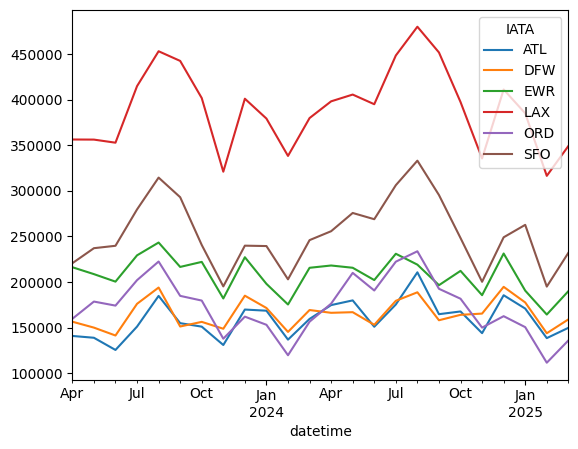

In [17]:
# Create a line graph showing, on a monthly basis, how many non-US passengers entered the US at each airport 
# in this data set. Do we see any recent downturn?

# I want a new table, based on df, in which:
# - index (rows) will have the dates/times
# - columns will have the airport codes
# - values will be the NonUsaPassengerCount
# - aggregation function will be sum

(
    df
    .pivot_table(index='datetime',
                 columns='IATA',
                 values='NonUsaPassengerCount',
                 aggfunc='sum')
    .resample('1ME').sum()   # add up the number of passengers at each airport for each month in our data set
    .loc[:'2025-03-31']
    .plot.line()
)